In [1]:
!pip install pandas
!pip install tensorflow==2.10.1
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-09-03 14:15:53.947171: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 14:15:54.008161: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 14:15:54.075960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 14:15:54.134324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 14:15:54.153699: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 14:15:54.259732: I tensorflow/core/platform/cpu_feature_gu

In [2]:
!pip install scipy

import os


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
train_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train',
    #label_mode='categorical',
    class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64,64)
)

test_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test',
    #label_mode='categorical',
    class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64,64)
)

val_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid',
    #label_mode='categorical',
    class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64,64)
)

Found 25136 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


2024-09-03 14:16:07.400474: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 2812 files belonging to 5 classes.


In [4]:
class_names = train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

2024-09-03 14:16:13.107312: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


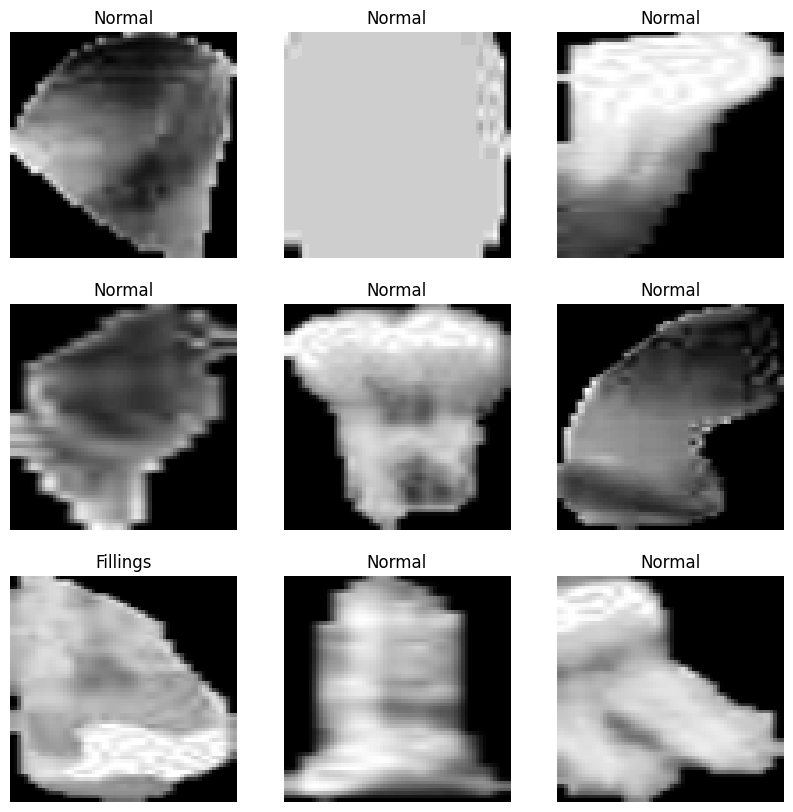

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [36]:
while i<5:
    for i, element in enumerate(train_ds.as_numpy_iterator()):
        print(element)

(array([[[[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        ...,

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]]],


       [[[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
     

In [ ]:
train_ds = train_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

## Previous trials for data extraction

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train',
                                                    target_size=(64, 64),
                                                    batch_size=32, class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid',
                                                    target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test',
                                                  target_size=(224, 224),
                                                  batch_size=32, class_mode='categorical')


Found 25136 images belonging to 5 classes.
Found 2812 images belonging to 5 classes.
Found 1649 images belonging to 5 classes.


In [34]:
image_vectors = []
labels = []

for i in range(len(train_generator)):
    # Extract batch of images and labels
    images, label_batch = train_generator[i]

    # Flatten the images and add them to the list
    for image in images:
        image_vectors.append(image.flatten())

    # Extend the labels list
    labels.extend(label_batch)

# Convert to Pandas DataFrame
train_df = pd.DataFrame({
    'image': image_vectors,
    'label': labels
})

# Display the first few rows of the DataFrame
print(train_df.head())

                                               image  \
0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.31764707, 0.31764707, 0.31764707, 0.3490196...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                       label  
0  [0.0, 0.0, 0.0, 1.0, 0.0]  
1  [0.0, 0.0, 0.0, 0.0, 1.0]  
2  [0.0, 0.0, 0.0, 1.0, 0.0]  
3  [0.0, 0.0, 0.0, 0.0, 1.0]  
4  [0.0, 1.0, 0.0, 0.0, 0.0]  


In [35]:
train_df.to_csv('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train/csv_train')
train_df.shape

(25136, 2)

In [9]:
import os

image_vectors = []
labels = []

for i in range(len(test_generator)):
    # Extract batch of images and labels
    images, label_batch = test_generator[i]

    # Flatten the images and add them to the list
    for image in images:
        image_vectors.append(image.flatten())

    # Extend the labels list
    labels.extend(label_batch)

# Convert to Pandas DataFrame
test_df = pd.DataFrame({
    'image': image_vectors,
    'label': labels
})

test_df.to_csv('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test/csv_test')

# Display the first few rows of the DataFrame
print(test_df.head())

                                               image  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                       label  
0  [0.0, 0.0, 0.0, 1.0, 0.0]  
1  [0.0, 1.0, 0.0, 0.0, 0.0]  
2  [0.0, 0.0, 0.0, 0.0, 1.0]  
3  [0.0, 0.0, 0.0, 0.0, 1.0]  
4  [0.0, 0.0, 0.0, 0.0, 1.0]  


In [31]:
test_df['image'][0].shape

(150528,)

In [36]:
image_vectors = []
labels = []

for i in range(len(valid_generator)):
    # Extract batch of images and labels
    images, label_batch = valid_generator[i]

    # Flatten the images and add them to the list
    for image in images:
        image_vectors.append(image.flatten())

    # Extend the labels list
    labels.extend(label_batch)

# Convert to Pandas DataFrame
valid_df = pd.DataFrame({
    'image': image_vectors,
    'label': labels
})

valid_df.to_csv('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid/csv_valid')

# Display the first few rows of the DataFrame
print(valid_df.head())

                                               image  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                       label  
0  [0.0, 0.0, 0.0, 0.0, 1.0]  
1  [0.0, 0.0, 0.0, 0.0, 1.0]  
2  [0.0, 0.0, 0.0, 1.0, 0.0]  
3  [0.0, 0.0, 0.0, 0.0, 1.0]  
4  [0.0, 0.0, 0.0, 0.0, 1.0]  


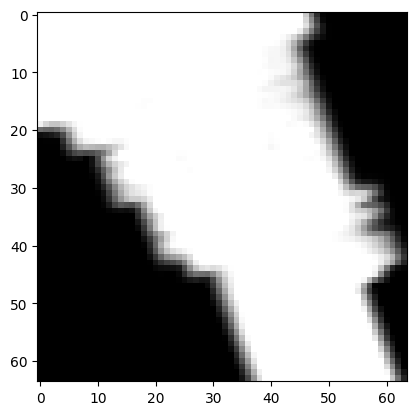

In [38]:
import matplotlib.pyplot as plt

plt.imshow(train_df['image'][0].reshape(64,64,3));

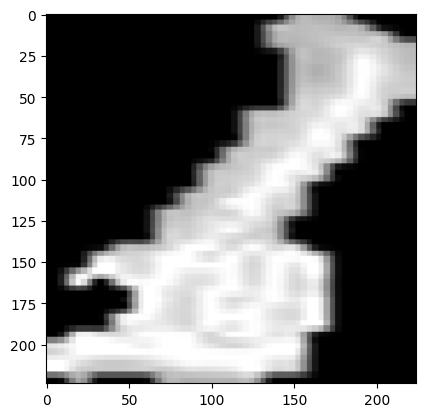

In [39]:
plt.imshow(test_df['image'][0].reshape(224,224,3));